In [1]:
import numpy as np
import pandas as pd
import os
import json
import numpy as np
import sys
from utils.cal_qed.qed import QED

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
from utils import cal_SA
from utils.cal_SA import sascorer

In [4]:
from sklearn.manifold import TSNE

In [5]:
from sklearn.decomposition import PCA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
import seaborn as sns

In [8]:
import networkx as nx

In [9]:
def del_nullstr(input_data):
    out =[]
    for item in range(len(input_data)):
        data = input_data[item]
        if data == '':
            pass
        else:
            out.append(data)
    return np.asarray(out)

In [10]:
def del_trivial_str(input_data):
    out = []
    for item in range(len(input_data)):
        data = input_data[item]
        if len(data) < 3 :
            pass
        else:
            out.append(data)
    return np.asarray(out)
def get_uni_str(input_data):
    return np.unique(input_data)
def del_nullmol(input_data):
    out =[]
    for item in range(len(input_data)):
        data = input_data[item]
        mol_data = Chem.MolFromSmiles(data)
        if mol_data == None:
            pass
        else:
            out.append(data)
    return np.asarray(out)
def post_smi(input_data):
    out =[]
    out = del_trivial_str(input_data)
    out = get_uni_str(out)
    out = del_nullmol(out)
    return out
def get_mol_set(input_sset):
    mol_set = []
    for item in range(len(input_sset)):
        s_data = input_sset[item]
        data_mol = Chem.MolFromSmiles(s_data)
        if data_mol == None:
            print(item)
        else:
            mol_set.append(data_mol)
    return mol_set
def get_mol(input_smi):
    data_mol = Chem.MolFromSmiles(input_smi)
    return data_mol
def get_qed_set_smi(smi_set):
    qed_set = []
    for item in range(len(smi_set)):
        s_data = smi_set[item]
        mol_ = get_mol(s_data)
        if mol_ == None:
            print(item)
            qed_ = 0
        else:
            qed_ = QED.qed(mol_)
        qed_set.append(qed_)
    return np.asarray(qed_set)
        
def get_qed_set(mol_set):
    qed_set = []
    for item in range(len(mol_set)):
        mol_data = mol_set[item]
        qed_ = QED.qed(mol_data)
        qed_set.append(qed_)
    return np.asarray(qed_set)
def get_sa_set(mol_set):
    sa_set =[]
    for item in range(len(mol_set)):
        mol_data = mol_set[item]
        sa_ = sascorer.calculateScore(mol_data)
        sa_set.append(sa_)
    return np.asarray(sa_set)


def get_sa_set_smi(smi_set):
    sa_set = []
    for item in range(len(smi_set)):
        s_data = smi_set[item]
        mol_ = get_mol(s_data)
        if mol_ == None:
            print(item)
            sa_ = 0
        else:
            sa_ = sascorer.calculateScore(mol_)
        sa_set.append(sa_)
    return np.asarray(sa_set)
def cal_nbits_vect_smi(smis, nbit):
    radius = 2
    mol = Chem.MolFromSmiles(smis)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nbit)
    fp_list = list(fp.ToBitString())
    fp_list = [int(bit) for bit in fp_list]
    #fp_list.extend([0] * (nbit - len(fp_list)))
    return fp_list

def cal_nbits_vect(mols, nbit):
    radius = 2
    fp = AllChem.GetMorganFingerprintAsBitVect(mols, radius, nBits=nbit)
    fp_list = list(fp.ToBitString())
    fp_list = [int(bit) for bit in fp_list]
    #fp_list.extend([0] * (nbit - len(fp_list)))
    return fp_list

def get_128fp_set(mol_set):
    n_bits = 128
    fp_set =[]
    for item in range(len(mol_set)):
        mol_ = mol_set[item]
        fp_ = cal_nbits_vect(mol_,n_bits)
        fp_set.append(fp_)
    return np.asarray(fp_set)
def top_n_max(array, n):
    # 使用argsort()函数获取数组中元素的排序索引
    sorted_indices = np.argsort(array)
    
    # 获取数组中的N个最大值的索引
    top_indices = sorted_indices[-n:][::-1]
    
    # 获取数组中的N个最大值
    top_values = array[top_indices]
    
    return top_values, top_indices
def similarity(vector1, vector2):
    """
    计算两个向量之间的相似度
    这里使用向量的余弦相似度作为相似度度量
    """
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    similarity_score = dot_product / (norm1 * norm2)
    return similarity_score
def construct_adjacency_matrix(vectors):
    """
    构建邻接矩阵，表示向量之间的相似度
    """
    n = len(vectors)
    adj_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            adj_matrix[i, j] = similarity(vectors[i], vectors[j])
    return adj_matrix


In [11]:
s_psk = np.load('../my_Gemma_smi.npy')

In [12]:
s_psk_p1 = post_smi(s_psk)

In [13]:
len(s_psk_p1)

168

In [14]:
sa_psk = get_sa_set_smi(s_psk_p1)

In [15]:
max(sa_psk)

6.497323046467979

In [17]:
new_dopi_psk=np.load('../my_new_dopi_2.npy')

In [34]:
new_dopi_psk = new_dopi_psk.reshape(168,1)

In [41]:
xxx = []
for i in new_dopi_psk:
    for j in i:
        xxx.append(j)

In [43]:
a,b=top_n_max(np.asarray(xxx), 20)

In [44]:
for i in range(len(s_psk)):
    if i in b:
        print(s_psk[i])
        print(new_dopi_psk[i])

C(=O)NC(=O)NC(O)
[7.82716414]
C(=O)NCCC[NH+]
[6.91351775]
C(=O)NNC(=O)NC(O)
[8.9797515]
C(C)NOCO
[6.71015211]
C(F)(F)C(=O)
[6.69046887]
C(F)(F)Nc3ccccc3
[6.69681237]
C(F)(F)c3ccccc3
[8.23171192]
CC(=O)N(F)C[NH+]
[6.75482323]
CC(=O)Nc3ccccc3
[6.94347656]
CC(C)(C)[N+](=O)[O-]
[6.72830929]
CCNC(CF)
[6.70711877]
CCNNC(=O)C(OC)
[7.93359234]
CCOC(=O)OC(C)
[7.47567667]
CCOC(=O)[NH2+]
[6.70707256]
CNC(=O)C(=O)
[6.69750287]
O=C(NF)
[6.69046882]
OCC(=O)N
[6.6904918]
OCCCCCC1OC1
[7.97017338]
OCCc3ccccc3
[6.82884732]
c1nn1Cc1ccccc1
[6.70762946]


In [45]:
fp_psk.shape

(168, 128)

In [46]:
pca_psk.shape

(168, 130)

In [47]:
pca_psk2 = np.concatenate((fp_psk,sa_psk,new_dopi_psk),axis=1)

In [48]:
pca_ = PCA(n_components=20)

In [49]:
out_pca_psk = pca_.fit_transform(pca_psk2)

In [50]:
out_pca_psk.shape

(168, 20)

In [51]:
tsne = TSNE(min_grad_norm=1e-3,init='pca',method='exact',angle=1,early_exaggeration=5,n_iter=1000)

In [52]:
out_tsne_psk = tsne.fit_transform(out_pca_psk)

/Users/junjiehu/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/junjiehu/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [53]:
out_tsne_psk.shape

(168, 2)

In [55]:
out_pca_fp = pca_.fit_transform(fp_psk)
out_tsne_fp = tsne.fit_transform(out_pca_fp)

/Users/junjiehu/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/junjiehu/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [56]:
adj_fp = construct_adjacency_matrix(out_tsne_fp)

In [57]:
tsne_psk_new = np.concatenate((out_tsne_fp,new_dopi_psk),axis=1)

In [58]:
out_tsne_new = tsne.fit_transform(tsne_psk_new)

/Users/junjiehu/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/junjiehu/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [59]:
out_tsne_new.shape

(168, 2)

In [60]:
xxx = (out_tsne_new.T)[0]

In [61]:
yyy = (out_tsne_new.T)[1]

In [62]:
xxxx= (xxx-min(xxx))/(max(xxx)-min(xxx))

In [63]:
yyyy = (yyy-min(yyy))/(max(yyy)-min(yyy))

In [64]:
xxxx = xxxx.reshape(168,1)

In [65]:
yyyy = yyyy.reshape(168,1)

In [66]:
zzz = new_dopi_psk

In [67]:
zzzz=(zzz-min(zzz))/(max(zzz)-min(zzz))

In [68]:
adj_input = np.concatenate((xxxx,yyyy,zzzz),axis=1)

In [69]:
adj_new3 = construct_adjacency_matrix(adj_input)

In [70]:
graph_new3 = nx.from_numpy_array(adj_new3)

In [71]:
pagerank_scores_new3 = nx.pagerank(graph_new3, alpha = 0.001, max_iter=100, tol=1e-05)

In [72]:
# 按照 PageRank 值排序
sorted_pagerank_scores = sorted(pagerank_scores_new3.items(), key=lambda x: x[1], reverse=True)

# 获取排名最高的 30 个节点作为推荐结果
top_recommendations = [node for node, score in sorted_pagerank_scores[:20]]
print("Top recommendations:", top_recommendations)

Top recommendations: [3, 118, 90, 9, 120, 0, 134, 133, 25, 41, 74, 36, 75, 39, 53, 43, 82, 32, 58, 11]


In [73]:
for i in range(len(s_psk)):
    if i in top_recommendations:
        print(s_psk[i])
        print(new_dopi_psk[i])

C(=O)N(F)
[6.69046882]
C(=O)NCC(F)
[6.68984964]
C(=O)N[NH+]C(=O)
[6.6904114]
C(=S)N=S
[6.6904688]
C(C)(C)C(=O)
[6.69036761]
C(F)(F)(Cl)
[6.6904688]
C(F)(F)C(=O)
[6.69046887]
C(F)(F)[N+](=O)(Cl)
[6.6904688]
C(F)(F)c3ccccc3
[8.23171192]
C=C(=O)
[6.6904688]
C=NN
[6.6904688]
C=[N+](=O)
[6.6904688]
CC(C)(C)[N+](=O)(Cl)
[6.6904688]
CC(C)(C)[N+](=O)[O-]
[6.72830929]
CCNC(=O)N(=O)
[6.50738789]
CCNN(CCO)
[6.12666789]
CNC(=O)
[6.69046858]
CNC(=O)C(=O)
[6.69750287]
O=C(N=O)
[6.69046873]
O=C(NF)
[6.69046882]


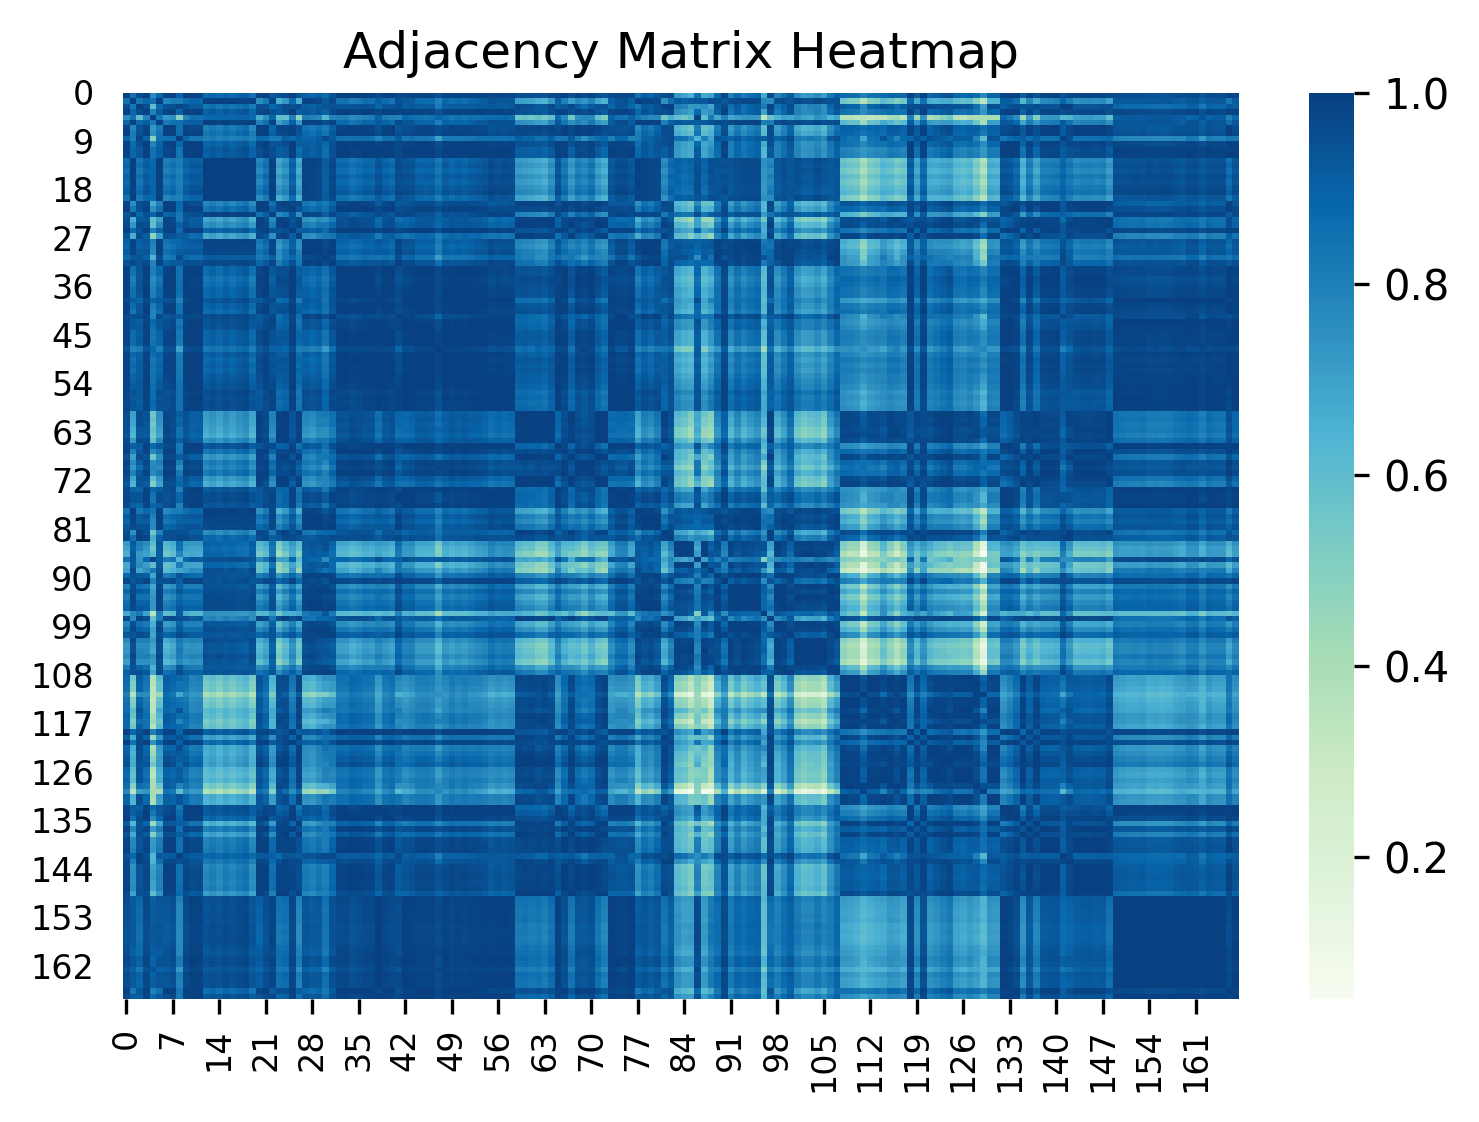

In [80]:
plt.figure(dpi=300)
sns.heatmap(data=adj_new3,
            cmap=plt.get_cmap('GnBu'),#matplotlib中的颜色盘'tab20c'
            #yticklabels=new_label3,
            #yticklabels=new_label,
           )
plt.yticks(size = 8)
plt.xticks(size = 8)
plt.tick_params(top=False,bottom=True,left=False,right=False)
plt.title("Adjacency Matrix Heatmap",size=12)
plt.savefig('heatmap-psk.jpg', bbox_inches='tight')

In [ ]:
'''
'palette' is not a valid value for name; supported values are 
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 
'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r',
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 
'winter', 'winter_r'

'''

In [81]:
vis_x = xxx 
vis_y = yyy

In [82]:
minz = 0
maxz = 256
c1 = cm.viridis_r(int(256*(50-minz)/(maxz-minz)))

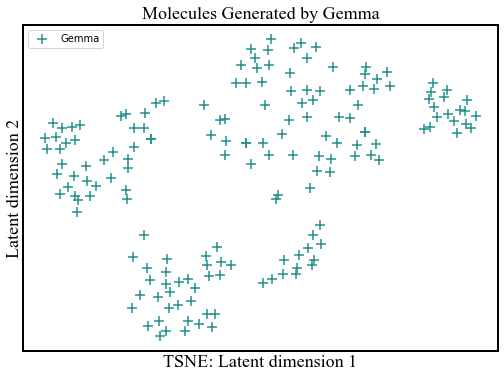

In [89]:
f=plt.figure(figsize=(8.5,6))
ax=plt.gca()

c1 = cm.viridis_r(int(256*(128-minz)/(maxz-minz)))


ax.scatter(vis_x,vis_y,marker = '+',color=c1, label='Gemma', s=100)
#ax.scatter(x2,y2,marker = '+',color=c2, label='Gemma', s=50)
#ax.scatter(x3,y3,marker = '>',color=c3, label='GPT NeoX', s=50)

ax.set_xlabel('TSNE: Latent dimension 1',fontdict={'family':'Times New Roman','size':'18','fontstyle':'normal','fontweight':'normal'})
ax.set_ylabel('Latent dimension 2',labelpad=0,fontdict={'family':'Times New Roman','size':'18','fontstyle':'normal','fontweight':'normal'})
ax.set_title('Molecules Generated by Gemma', fontdict={'family':'Times New Roman','size':'18','fontstyle':'normal','fontweight':'normal'})
ax.legend(loc='upper left')
#ax1.tick_params(labelsize=22)
ax.set_xticks(())
ax.set_yticks(())
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

#plt.savefig('gemma-psk.svg', dpi=300, format = 'svg')
plt.savefig('gemma-psk.jpg', dpi=300)

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [91]:
def get_fig_data(input_data):
    bins = 10
    data = input_data
    breaks = np.linspace(np.min(data), np.max(data), bins)
    counts = {}
    for i in range(len(breaks) - 1):
        left, right = breaks[i], breaks[i+1]
        label = f"({left:.2f}, {right:.2f}]"
        count = 0
        for val in data:
            if val > left and val <= right:
                count += 1
        counts.update({label: count})
    print(counts)
    pd.cut(pd.Series(data), bins=breaks, precision=2).value_counts()
    return data

In [97]:
dopi_ =[]
for i in new_dopi_psk:
    dopi_.append(i[0])

In [98]:
data_dopi_psk = get_fig_data(dopi_)

{'(5.46, 5.85]': 2, '(5.85, 6.24]': 8, '(6.24, 6.63]': 20, '(6.63, 7.03]': 131, '(7.03, 7.42]': 0, '(7.42, 7.81]': 1, '(7.81, 8.20]': 3, '(8.20, 8.59]': 1, '(8.59, 8.98]': 1}


In [106]:
sa_ =[]
for j in sa_psk:
    sa_.append(j[0])

In [107]:
data_sa_psk = get_fig_data(sa_)

{'(1.00, 1.61]': 8, '(1.61, 2.22]': 18, '(2.22, 2.83]': 27, '(2.83, 3.44]': 29, '(3.44, 4.05]': 22, '(4.05, 4.66]': 31, '(4.66, 5.28]': 17, '(5.28, 5.89]': 9, '(5.89, 6.50]': 6}


In [115]:
def make_2data_fig(input_data1,input_label1,input_data2,input_label2):
    data1 = input_data1
    label1 = input_label1
    data2 = input_data2
    label2 = input_label2
    
    kwargs = {
        "bins": 40,
        "histtype": "stepfilled",
        "alpha": 0.5
    }
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.hist(data1, label=label1, **kwargs)
    ax.hist(data2, label=label2, **kwargs)
    #ax.hist(data3, label="template", **kwargs)
    ax.set_title("The Properties of Generated Molecules")
    fig.text(0.065,0.5,'Number of compounds',va='center',rotation='vertical',size = '14')
    ax.legend(loc='upper left')
    #plt.savefig('psk-gemma-dopi-sa.svg', dpi=300,format='svg')
    plt.savefig('psk-gemma-dopi-sa.jpg', dpi=300)

In [99]:
def make_data_fig(input_data1,input_label1):
    data1 = input_data1
    label1 = input_label1
    
    kwargs = {
        "bins": 40,
        "histtype": "stepfilled",
        "alpha": 0.5
    }
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.hist(data1, label=label1, **kwargs)
    #ax.hist(data2, label=label2, **kwargs)
    #ax.hist(data3, label=label3, **kwargs)
    #ax.hist(data3, label="template", **kwargs)
    ax.set_title("The Dipole Moment of Generated Molecules")
    fig.text(0.065,0.5,'Number of compounds',va='center',rotation='vertical',size = '14')
    ax.legend()
    #plt.savefig('qed-1-913-2.svg', dpi=300,format='svg')

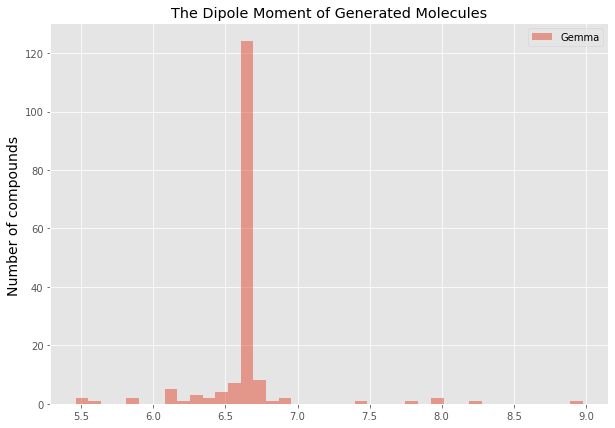

In [100]:
make_data_fig(data_dopi_psk,'Gemma')

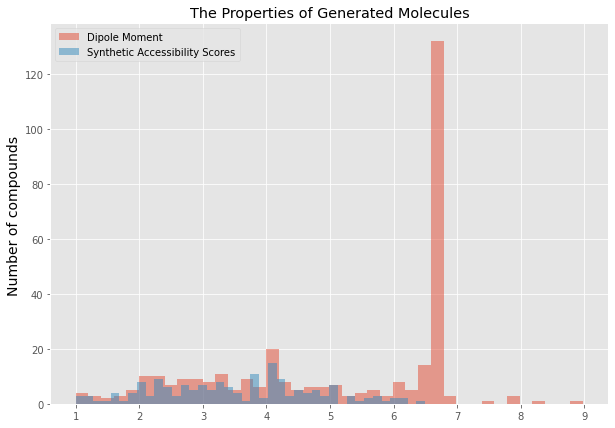

In [116]:
make_2data_fig(data_dopi_psk,'Dipole Moment', data_sa_psk, 'Synthetic Accessibility Scores')